In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
# dataset: DataFrame
X = dataset.iloc[:,:-1].values
# .values를 생략할 경우, X: DataFrame
# .values는 DataFrame의 value만 추출 → ndarray
y = dataset.iloc[:,-1].values

In [3]:
print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [4]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.25,
                                           random_state=1)

In [5]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(300, 2)
(300,)
(100, 2)
(100,)


In [6]:
print(X[:,0].max())
print(X[:,0].min())
print(X[:,1].max())
print(X[:,1].min())
# Age와 EstimatedSalary의 scale의 차이가 크므로 Scaling해야 함
# KNN은 거리 기반의 classifier이므로 반드시 scaling을 거쳐야 함

60
18
150000
15000


In [7]:
from sklearn.preprocessing import StandardScaler 
# from sklearn.preprocessing import MinMaxScaler
# StandardScaler: 평균이 0이고 분산(표준편차)이 1인 분포의 데이터로 변경
# MinMaxsScaler: 최대가 1 최소가 0인 데이터로 변경
sc = StandardScaler()
# fit은 변환(transform)하기 전의 필요한 정보를 가져옴
# StandardScaler: 평균, 분산 등 (각 열의 정보)
# MinMaxScaler: 최대, 최소 값 등 (각 열의 정보)
sc.fit(xTrain)

# training X 변환
xScTrain = sc.transform(xTrain)
# test X 변환
xScTest = sc.transform(xTest)

In [8]:
# 변환 데이터 검토
print(np.mean(xScTrain,axis=0))
# 평균 0
print(np.std(xScTrain,axis=0))
# 표준편차 1

print(np.mean(xScTest,axis=0))
print(np.std(xScTest,axis=0))

[ 3.50460401e-16 -1.58761893e-16]
[1. 1.]
[0.2033351 0.0896134]
[1.08910653 1.03414246]


In [9]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=51, # 이웃의 수: default=5
                           weights='uniform', 
                           # 가중치: distance→가까운 데이터에 더 큰 가중치 (default: uniform(모두 동일))
                           p=2, metric='minkowski') 
                           # 위의 p와 metric은 euclidean 거리를 의미(default)
knn.fit(xScTrain,yTrain)

KNeighborsClassifier(n_neighbors=51)

In [10]:
# xScTest 데이터에 대한 prediction
yPred = knn.predict(xScTest)

In [11]:
# xScTrain 데이터에 대한 prediction
yPredTr = knn.predict(xScTrain)

In [12]:
# yPred와 yTest를 비교하여 accuracy 확인
from sklearn.metrics import accuracy_score
trainKnnAcc = accuracy_score(yTrain,yPredTr)
print(trainKnnAcc * 100,'%')
testKnnAcc = accuracy_score(yTest,yPred)
print(testKnnAcc * 100,'%')

89.0 %
88.0 %


In [13]:
# class = 0인 xTest
# ndarray[조건식,:] → 조건식이 참인 행만 추출
X0 = xTest[yTest == 0,:]
# class = 1인 xTest
X1 = xTest[yTest == 1,:]

In [14]:
# prediction class = 0인 xTest
# ndarray[조건식,:] → 조건식이 참인 행만 추출
X0pred = xTest[yPred == 0,:]
# prediction class = 1인 xTest
X1pred = xTest[yPred == 1,:]

In [15]:
yTest.shape

(100,)

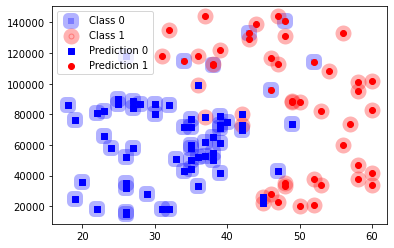

In [16]:
# target=0인 test 데이터
plt.scatter(X0[:,0],X0[:,1],marker='s',linewidth=10,
            color='blue',alpha=0.3,label='Class 0')
# target=1인 test 데이터
plt.scatter(X1[:,0],X1[:,1],marker='o',linewidth=10,
            color='red',alpha=0.3,label='Class 1')

# prediction=0인 test 데이터
plt.scatter(X0pred[:,0],X0pred[:,1],marker='s',linewidth=1,
            color='blue',label='Prediction 0')
# prediction=1인 test 데이터
plt.scatter(X1pred[:,0],X1pred[:,1],marker='o',linewidth=1,
            color='red',label='Prediction 1')

plt.legend()